<a href="https://colab.research.google.com/github/clarefausty/Python-Bioinformatics/blob/main/Part4(Building_a_Simple_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**

Chinwendu Faustina Achilonu


 ### Building a machine learning model using the ChEMBL bioactivity data.

 **Part 4**, is the building of a regression model of ovarian cancer cell line inhibitors using the random forest algorithm.


## **1. Import libraries**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Load data set

In [2]:
!wget https://github.com/clarefausty/Python-Bioinformatics/blob/main/files/Ovarian_cancer_cell_line_processed_02_bioactivity_data_pIC50_pubchem_fp.csv

--2024-07-24 07:36:12--  https://github.com/clarefausty/Python-Bioinformatics/blob/main/files/Ovarian_cancer_cell_line_processed_02_bioactivity_data_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Ovarian_cancer_cell_line_processed_02_bioactivity_data_pIC50_pubchem_fp.csv’

Ovarian_cancer_cell     [ <=>                ] 294.16K  --.-KB/s    in 0.1s    

2024-07-24 07:36:13 (2.94 MB/s) - ‘Ovarian_cancer_cell_line_processed_02_bioactivity_data_pIC50_pubchem_fp.csv’ saved [301223]



In [6]:
df = pd.read_csv("Ovarian_cancer_cell_line_processed_02_bioactivity_data_pIC50_pubchem_fp.csv")
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.207608
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.759451
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.838632
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.698970
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.649752
5,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.943095
6,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.229148
7,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.974694
8,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.723538
9,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.651695


## **3. Input features**
The ***Ovarian_cancer_cell_line*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**


In [7]:
x = df.drop("pIC50", axis=1)
x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [8]:
y = df.pIC50
y

0     7.207608
1     3.759451
2     6.838632
3     9.698970
4     6.649752
5     6.943095
6     7.229148
7     6.974694
8     6.723538
9     6.651695
10    8.958607
11    4.236572
12    6.801343
13    7.886057
14    7.055517
15    6.818156
16    6.113509
17    8.000000
18    4.769551
19    4.958607
20    4.823909
21    4.920819
22    5.031517
23    4.769551
24    6.036212
25    5.920819
26    8.045757
27    9.698970
28    8.698970
29    3.249646
30    4.123205
31    7.356547
32    7.259637
33    4.397940
Name: pIC50, dtype: float64

### **3.3. Examine the data dimension**

In [9]:
x.shape

(34, 881)

In [10]:
y.shape

(34,)

### **3.4. Remove low variance features**

In [12]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
x = selection.fit_transform(x)

In [13]:
x.shape

(34, 190)

## **4. Data split (80/20 ratio)**

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [16]:
x_train.shape, y_train.shape

((27, 190), (27,))

In [17]:
x_test.shape, y_test.shape

((7, 190), (7,))

## **5. Building a Regression Model using Random Forest**

In [19]:
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)
r2 = model.score(x_test, y_test)
r2

-2.091346767198824

In [21]:
y_pred = model.predict(x_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

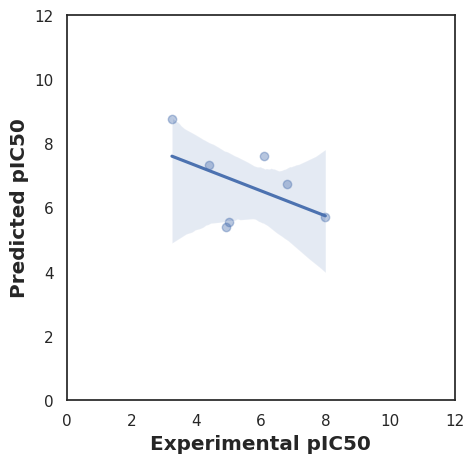

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from y_test and y_pred
df = pd.DataFrame({'Experimental pIC50': y_test, 'Predicted pIC50': y_pred})

sns.set(color_codes=True)
sns.set_style("white")

# Use the DataFrame as input to sns.regplot()
ax = sns.regplot(x='Experimental pIC50', y='Predicted pIC50', data=df, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()
